## Artificial Neural Network


### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv("BankCustomers.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Splitting the dataset into features and target
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
# Convert the categorical columns into dummy variables
geography = pd.get_dummies(X["Geography"], drop_first=True)
genter = pd.get_dummies(X['Gender'], drop_first=True)

In [5]:
# Drop the categorical columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [6]:
# concatenate the dummy variables with the original dataset
X = pd.concat([X, geography, genter], axis=1)

In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Artificial Neural Network

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer='uniform'))

# Adding the second hidden layer
classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))

# Adding the output layer
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8743 - loss: 0.3201
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8692 - loss: 0.3138
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8688 - loss: 0.3202
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8693 - loss: 0.3237
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8720 - loss: 0.3153
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8706 - loss: 0.3229
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8675 - loss: 0.3260
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8677 - loss: 0.3273
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8743 - loss: 0.3073
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8740 - loss: 0.3164
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8671 - loss: 0.3234
Epoch 12/50
800/800 ━━━━━━━━━━

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

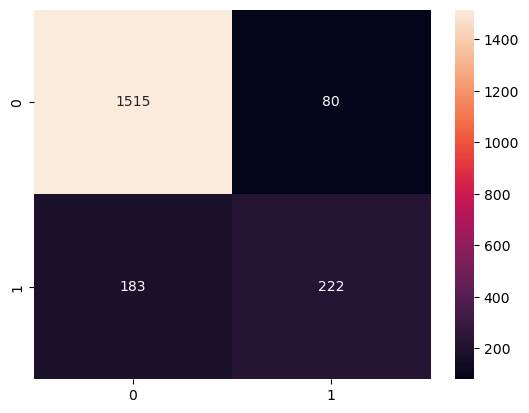

In [25]:
# plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [26]:
print(accuracy)

0.8685


### Confusion Matrix Details:
1. True Negative (TN) = 1515
2. False Positive (FP) = 80
3. False Negative (FN) = 183
4. True Positive (TP) = 222

### Model Accuracy:
0.8685, or 86.85%.
